In [18]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from statsmodels.compat import lzip
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
%run ../pyfiles/data_cleaning
%run ../pyfiles/regression

## Data Preprocessing

In [46]:
df = pd.read_csv('../data/data.tsv', sep = '\t')

In [58]:
viz = df.loc[:,['DVWEEKEND', 'DVENDNIGHT', 'DVWEEKNIGHT']]
viz2 = []
for column in viz.columns:
    viz2.append(viz[column].sum())
viz_final = pd.DataFrame(zip(viz.columns, viz2))
sns.barplot(x = viz_final[0], y = viz_final[1]); 

,0,1
0,DVWEEKEND,2541
1,DVENDNIGHT,1370
2,DVWEEKNIGHT,2029


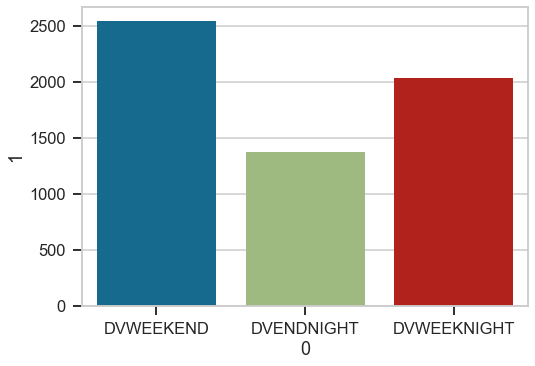

In [62]:
sns.barplot(x = viz_final[0], y = viz_final[1]); 

In [19]:
df = pd.read_csv('../data/data.tsv', sep = '\t')
df = clean_orig_dataset(df)
X = df.drop('AVGDV', axis = 1)
y = df['AVGDV']

In [11]:
# scale dataframe
scaled_df = scale_dataset(X)

### Cook's Distance

In [12]:
from yellowbrick.regressor import CooksDistance
from yellowbrick.datasets import load_concrete

C:\Users\allis\Anaconda3\lib\site-packages\yellowbrick\regressor\influence.py:183: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  self.distance_, linefmt=self.linefmt, markerfmt=self.markerfmt


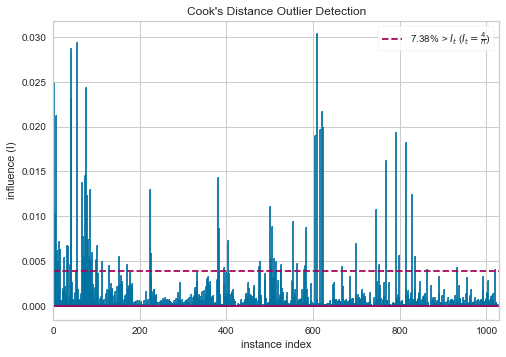

In [13]:
# Load the regression dataset
X, y = load_concrete()

# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

### Recursive Feature Elimination

In [14]:
rfe_df = recursive_feature_elimination(scaled_df, X, y)
rfe_df.drop('AVGADW0001', axis = 1, inplace = True)

ValueError: Found input variables with inconsistent numbers of samples: [431, 1030]

In [ ]:
rfe_df.corr()

In [ ]:
rfe_res = run_model(rfe_df, y)

In [ ]:
clf = lasso_for_predict(lasso_df, y)

In [ ]:
print(mean_squared_error(y, clf.predict(lasso_df)))
print(r2_score(y, clf.predict(lasso_df)))

### Visualizations: EDA

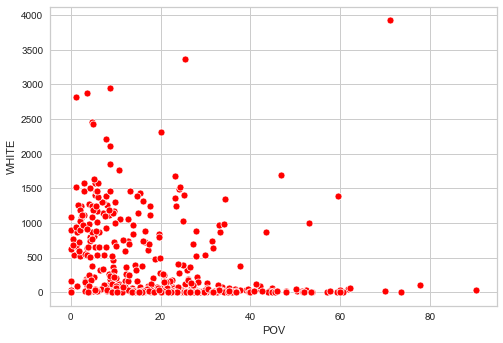

In [21]:
sns.scatterplot(X['POV'], X['WHITE'], color = 'red')
sns.set_context('talk')

In [24]:
df.columns

Index(['VACANTPERCENT', 'POP2004', 'POP04_SQMI', 'WHITE', 'BLACK', 'ASIAN',
       'HISPANIC', 'AGE_5_17', 'AGE_18_21', 'AGE_22_29', 'AGE_30_39',
       'AGE_40_49', 'AGE_50_64', 'AGE_65_UP', 'VACANT', 'SQMI', 'PSA',
       'UNEMPL', 'POV', 'SAMEHOUSE', 'PROFMAN', 'MALE', 'FEMALE', 'YOUNGPOP',
       'YOUNGUNEMP', 'CONCDIS', 'RESSTAB', 'PROSOCIAL', 'METRO_BG',
       'PUBHOUSPT', 'REC_BG', 'OFFPREM_BG', 'ONPREM_BG', 'STORE_BG',
       'NIGHT_BG', 'TAVERN_BG', 'REST_BG', 'PHYSDIS0506', 'PHYSDIS0203',
       'AVGDV', 'SCH_BG', 'AVGMPDDIS', 'AVGADW0001', 'RESIDENTIALCOUNT',
       'RETAILCOUNT', 'MOTELHOTELCOUNT', 'RECREATIONCOUNT', 'VACANTCOUNT',
       'COMRETAILPERCENT', 'RATE18_29', 'ADWWEEKEND', 'ADWNIGHTS',
       'ADWWEEKNIGHT', 'INVMILEDIST', 'STREETLIGHTDENSI', 'OFF_SQMI',
       'ON_SQMI', 'NIGHT_SQMI', 'TAVERN_SQMI', 'STORE_SQMI', 'REST_SQMI',
       'STLIGHT_SQMI', 'PROSO_SQMI', 'HOMLESS_SQMI', 'NO_SINGLES',
       'NOTALLOWS_SQMI', 'ALLOWS_SQMI', 'PCTNOTALLOW', 'ARR_0506'],
 